# *IBM HR Analytics: Workforce Insights & Attrition Analysis*

## **Project Context & Business Goal**

### Project Context
The dataset comes from the **[IBM HR Analytics Attrition Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data)**, which contains detailed employee-level information from a corporate workforce.  
It includes demographic attributes (age, gender, marital status, education), work-related features (department, job role, tenure, overtime, travel frequency), compensation (monthly income, salary hikes), and satisfaction ratings (job satisfaction, work-life balance, environment satisfaction).  
The target variable is **Attrition** (Yes/No), indicating whether an employee left the company.  

Employee attrition and workforce management are critical challenges for organizations:
- **High costs of turnover**: replacing an employee can cost between 50%–200% of their annual salary.  
- **Productivity and morale**: departures disrupt teams, knowledge transfer, and client relationships.  
- **Retention strategies**: identifying at-risk employees early allows HR to design targeted interventions.  

This dataset is widely used for HR analytics research and predictive modeling, making it a strong base for exploring how compensation, workload, satisfaction, and demographics affect attrition.  

### **Business Goal**
The main business goals of this project are to:
1. **Describe** workforce demographics, satisfaction, and attrition patterns.  
2. **Diagnose** key drivers of attrition using hypothesis testing and statistical analysis.  
3. **Validate** which factors significantly impact attrition (e.g., salary, overtime, tenure, travel).  
4. **Provide actionable HR insights** to improve retention and workforce well-being.  

Specifically, the analysis seeks to answer:  
- Which groups of employees are most at risk of leaving?  
- Do compensation, workload, or satisfaction significantly differ between leavers and stayers?  
- At what tenure stages are employees most vulnerable to attrition?  
- How can HR policies (salary adjustments, onboarding, travel policies) reduce attrition risk?  

By addressing these questions, the project provides **data-driven recommendations** to HR managers that can lower attrition, improve employee satisfaction, and reduce organizational costs.


# Data Import & Overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('Dataset/HR.csv')

In [4]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()[['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,6502.931293,15.209524,2.693197,11.279592,7.008163,4.229252,2.187755,4.123129
std,9.135373,8.106864,4707.956783,3.659938,2.498009,7.780782,6.126525,3.623137,3.222430,3.568136
min,18.000000,1.000000,1009.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2911.000000,12.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,7.000000,4919.000000,14.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,14.000000,8379.000000,18.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,29.000000,19999.000000,25.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000


# EDA

## Attrition Rate Overview

### What is the overall attrition rate?

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
np.round(len(df[df['Attrition'] == 'Yes']) / len(df) * 100, 2)

16.12

### How does it vary by age group, department, job role, or gender?

### Age

In [10]:
age_bins = [18, 30, 40, 50, 61]
age_labels = ['18-29', '30-39', '40-49', '50-60']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [181]:
age_attrition = df.groupby('AgeGroup', observed=False)['Attrition'].value_counts().unstack()

In [12]:
age_attrition['% of Attrition'] = np.round(age_attrition['Yes']/  age_attrition.sum(axis=1) * 100, 2)

In [13]:
age_attrition.columns.name = None

In [14]:
age_attrition = age_attrition.reset_index()

In [15]:
age_attrition

,AgeGroup,No,Yes,% of Attrition
0,18-29,235,91,27.91
1,30-39,533,89,14.31
2,40-49,315,34,9.74
3,50-60,150,23,13.29


### Department

In [16]:
department_attrition = df.groupby('Department')['Attrition'].value_counts().unstack()

In [17]:
department_attrition['% of Attrition'] = np.round(department_attrition['Yes'] / department_attrition.sum(axis=1) *100, 2)

In [18]:
department_attrition.columns.name = None

In [19]:
department_attrition

,No,Yes,% of Attrition
Department,,,
Human Resources,51,12,19.05
Research & Development,828,133,13.84
Sales,354,92,20.63


### Jobrole

In [20]:
jobrole_attrition = df.groupby('JobRole')['Attrition'].value_counts().unstack() 

In [21]:
jobrole_attrition['% of Attrition'] = np.round(jobrole_attrition['Yes'] / jobrole_attrition.sum(axis=1) *100, 2)

In [22]:
jobrole_attrition.columns.name = None

In [23]:
jobrole_attrition = jobrole_attrition.reset_index()

In [24]:
jobrole_attrition.sort_values(by='% of Attrition', ascending=False)

,JobRole,No,Yes,% of Attrition
8,Sales Representative,50,33,39.76
2,Laboratory Technician,197,62,23.94
1,Human Resources,40,12,23.08
7,Sales Executive,269,57,17.48
6,Research Scientist,245,47,16.10
4,Manufacturing Director,135,10,6.90
0,Healthcare Representative,122,9,6.87
3,Manager,97,5,4.90
5,Research Director,78,2,2.50


### Gender

In [25]:
gender_attrition = df.groupby('Gender')['Attrition'].value_counts().unstack()

In [26]:
gender_attrition['% of Attrition'] = np.round(gender_attrition['Yes'] / gender_attrition.sum(axis=1) * 100, 2)

In [27]:
gender_attrition.columns.name = None

In [28]:
gender_attrition = gender_attrition.reset_index()

In [29]:
gender_attrition

,Gender,No,Yes,% of Attrition
0,Female,501,87,14.80
1,Male,732,150,17.01


## Demographics

### What is the distribution of age, gender, education level, and marital status?

### Age

In [180]:
age_distribution = df.groupby('AgeGroup', as_index = False, observed=False).size()

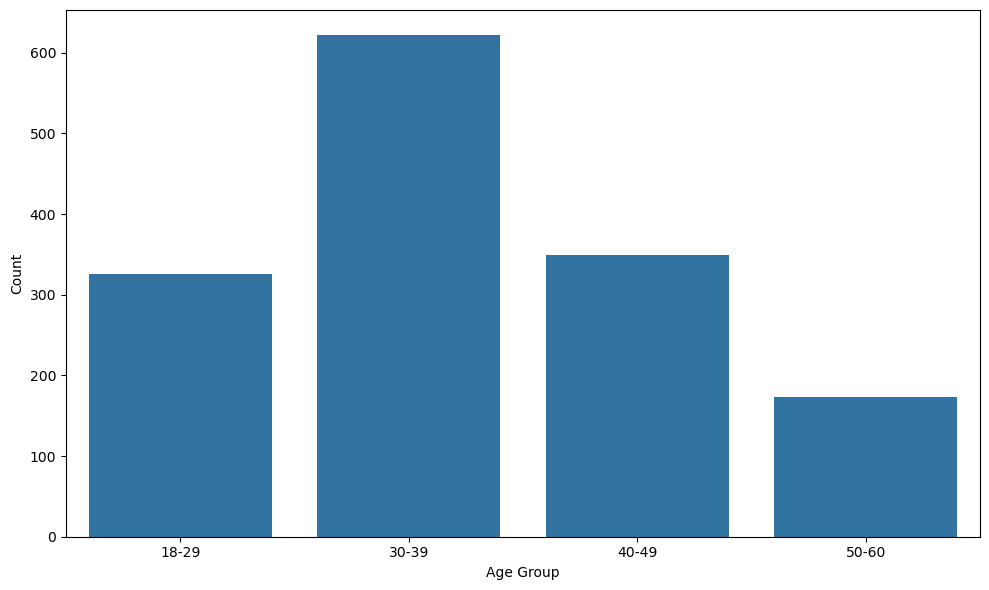

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(age_distribution, x = 'AgeGroup', y = 'size')

plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()

### Gender

In [32]:
gender_distribution = df.groupby('Gender').size().reset_index(name='Count')

In [33]:
gender_distribution['Percentage'] = np.round(gender_distribution['Count'] / gender_distribution['Count'].sum(axis=0) * 100, 2)

In [34]:
gender_distribution

,Gender,Count,Percentage
0,Female,588,40.0
1,Male,882,60.0


### Education level

In [35]:
education_df = pd.read_csv('Dataset/education.csv')

In [36]:
education_df

,EducationCode,EducationType
0,1,Below College
1,2,College
2,3,Bachelor
3,4,Master
4,5,Doctor


In [37]:
education_distribution = df.groupby('Education', as_index=False).size()

In [38]:
education_distribution = education_distribution.merge(education_df, left_on='Education', right_on = 'EducationCode')[['EducationType', 'size']]

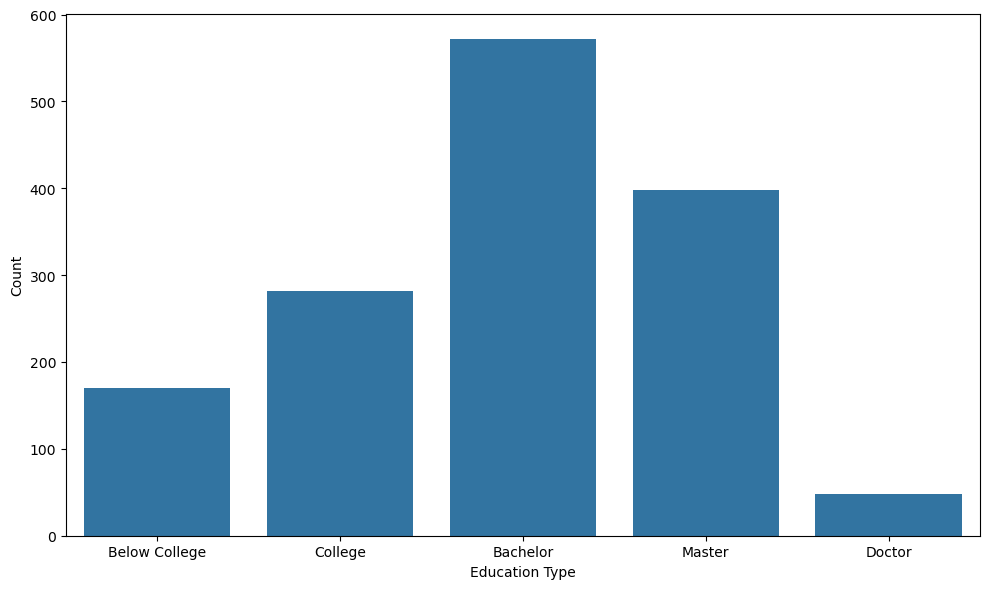

In [39]:
plt.figure(figsize=(10,6))

sns.barplot(education_distribution, x='EducationType', y='size')

plt.xlabel('Education Type')
plt.ylabel('Count')
plt.tight_layout()

### Marital status

In [40]:
marital_distribution = df.groupby('MaritalStatus', as_index=False).size()

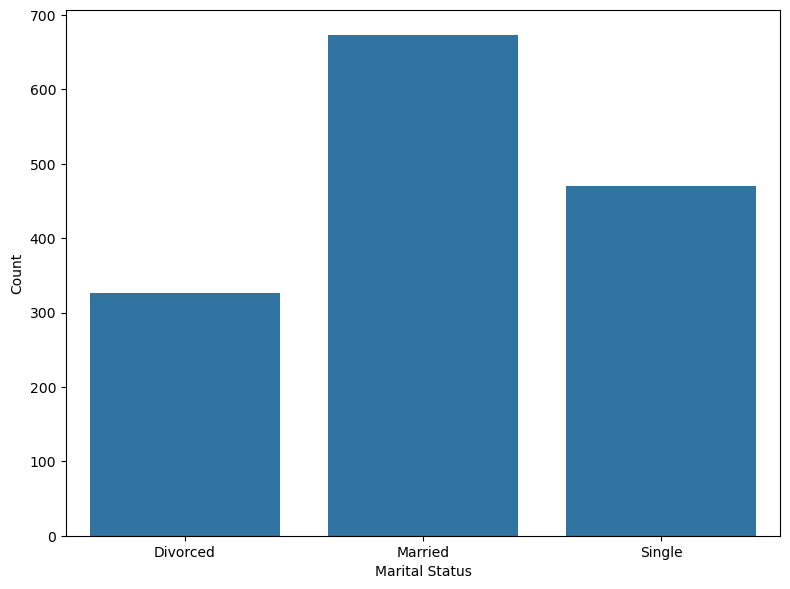

In [41]:
plt.figure(figsize=(8,6))

sns.barplot(marital_distribution, x = 'MaritalStatus', y = 'size')

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.tight_layout()

### What is the average tenure (YearsAtCompany) and income across the company?

In [42]:
df[['YearsAtCompany', 'MonthlyIncome']].mean()

YearsAtCompany       7.008163
MonthlyIncome     6502.931293
dtype: float64

## Satisfaction Levels

### What percentage of employees report low vs high job satisfaction, environment satisfaction, and work-life balance?

### Job Satisfaction

In [43]:
job_satisfaction_df = pd.read_csv('Dataset/job_satisfaction.csv')

In [44]:
job_satisfaction_df

,JobSatisfactionCode,JobSatisfactionType
0,1,Low
1,2,Medium
2,3,High
3,4,Very High


In [45]:
job_satisfaction = df.groupby('JobSatisfaction', as_index=False).size()

In [46]:
job_satisfaction = job_satisfaction.merge(job_satisfaction_df, left_on = 'JobSatisfaction', right_on='JobSatisfactionCode')[['JobSatisfactionType', 'size']]

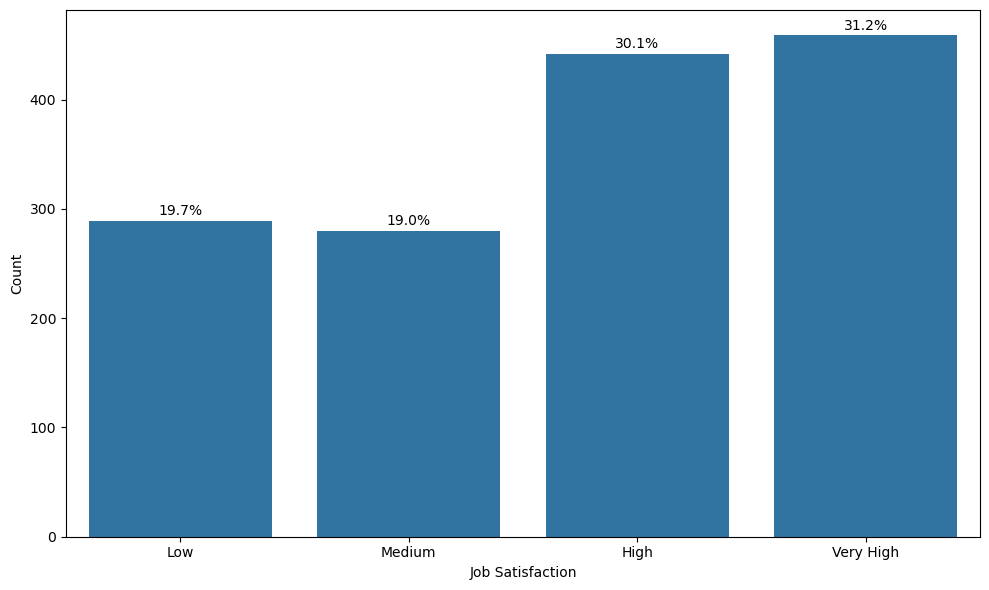

In [47]:
job_satisfaction['percent'] = job_satisfaction['size'] / job_satisfaction['size'].sum() * 100

plt.figure(figsize=(10,6))

ax = sns.barplot(job_satisfaction, x = 'JobSatisfactionType', y = 'size')
for i, row in job_satisfaction.iterrows():
    ax.text(i, row['size'] + 5, f"{row['percent']:.1f}%", ha='center')

plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.tight_layout()

### Environment Satisfaction

In [48]:
environment_satisfaction_df = pd.read_csv('Dataset/environment_satisfaction.csv')

In [49]:
environment_satisfaction_df

,EnvironmentSatisfactionCode,EnvironmentSatisfactionType
0,1,Low
1,2,Medium
2,3,High
3,4,Very High


In [50]:
environmemt_satisfaction = df.groupby('EnvironmentSatisfaction', as_index=False).size()

In [51]:
environmemt_satisfaction = environmemt_satisfaction.merge(environment_satisfaction_df, left_on = 'EnvironmentSatisfaction', right_on='EnvironmentSatisfactionCode')[['EnvironmentSatisfactionType', 'size']]

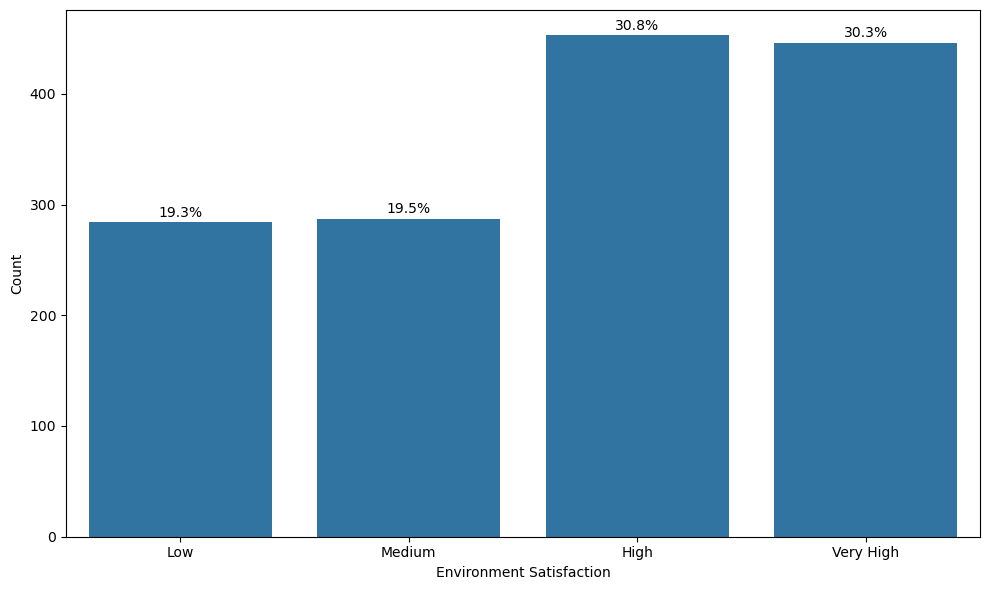

In [52]:
environmemt_satisfaction['percent'] = environmemt_satisfaction['size'] / environmemt_satisfaction['size'].sum() * 100

plt.figure(figsize=(10,6))

ax = sns.barplot(environmemt_satisfaction, x = 'EnvironmentSatisfactionType', y = 'size')
for i, row in environmemt_satisfaction.iterrows():
    ax.text(i, row['size'] + 5, f"{row['percent']:.1f}%", ha='center')

plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.tight_layout()

### Work life balance

In [53]:
work_life_balance_df = pd.read_csv('Dataset/work_life_balance.csv')

In [54]:
work_life_balance_df

,WorkLifeBalanceCode,WorkLifeBalanceType
0,1,Bad
1,2,Good
2,3,Better
3,4,Best


In [55]:
work_life_balance = df.groupby('WorkLifeBalance', as_index=False).size()

In [56]:
work_life_balance = work_life_balance.merge(work_life_balance_df, left_on = 'WorkLifeBalance', right_on='WorkLifeBalanceCode')[['WorkLifeBalanceType', 'size']]

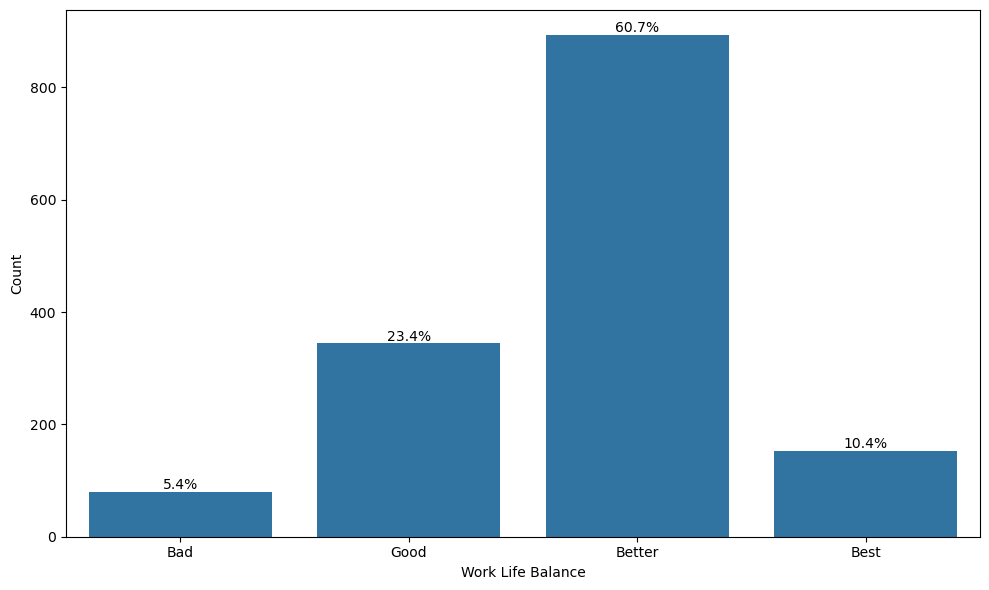

In [57]:
work_life_balance['percent'] = work_life_balance['size'] / work_life_balance['size'].sum() * 100

plt.figure(figsize=(10,6))

ax = sns.barplot(work_life_balance, x = 'WorkLifeBalanceType', y = 'size')
for i, row in work_life_balance.iterrows():
    ax.text(i, row['size'] + 5, f"{row['percent']:.1f}%", ha='center')

plt.xlabel('Work Life Balance')
plt.ylabel('Count')
plt.tight_layout()

## Workload Insights

### How many employees work overtime?

In [58]:
overtime = df.groupby('OverTime', as_index=False).size()

In [59]:
overtime['Percentage'] = np.round(overtime['size'] / overtime['size'].sum(axis=0) * 100, 2)

In [60]:
overtime

,OverTime,size,Percentage
0,No,1054,71.7
1,Yes,416,28.3


### How does overtime vary by department or job role?

### Department

In [61]:
department_overtime = (
    df.groupby(["Department", "OverTime"])
      .size()
      .reset_index(name="Count")
      .pivot(index="Department", columns="OverTime", values="Count")
      .fillna(0)
      .reset_index()
)

In [62]:
department_overtime["Total"] = department_overtime["No"] + department_overtime["Yes"]

In [63]:
department_overtime["% of OverTime"] = np.round(
    department_overtime["Yes"] / department_overtime["Total"] * 100, 2
)

In [64]:
department_overtime.columns.name = None

In [65]:
department_overtime

,Department,No,Yes,Total,% of OverTime
0,Human Resources,46,17,63,26.98
1,Research & Development,690,271,961,28.20
2,Sales,318,128,446,28.70


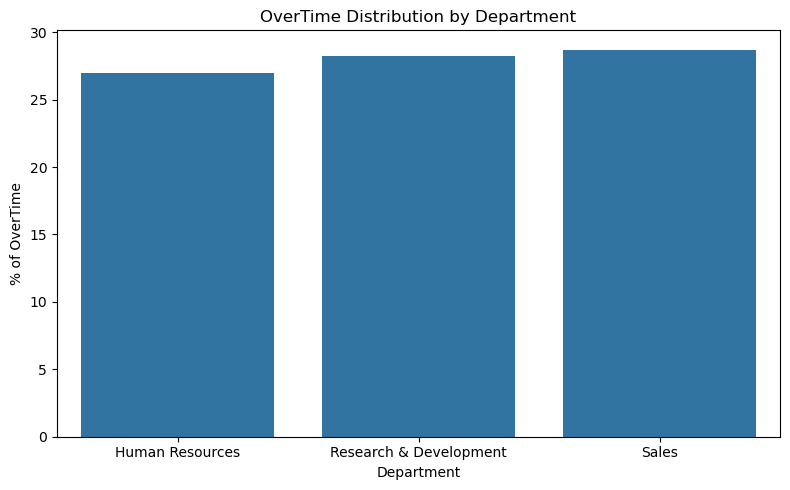

In [168]:
plt.figure(figsize=(8,5))
sns.barplot(department_overtime, x="Department", y="% of OverTime")

plt.title("OverTime Distribution by Department")
plt.tight_layout()

### Job Role

In [67]:
role_overtime = (
    df.groupby(['JobRole', 'OverTime'])
    .size()
    .reset_index(name='Count')
    .pivot(index='JobRole', columns='OverTime', values='Count')
    .fillna(0)
    .reset_index()
)

In [68]:
role_overtime['Total'] = role_overtime['No'] + role_overtime['Yes']

In [69]:
role_overtime['% of OverTime'] = np.round(role_overtime['Yes']/role_overtime['Total'] * 100, 2)

In [70]:
role_overtime.columns.name = None

In [71]:
role_overtime.sort_values(by='% of OverTime', ascending=False)[['JobRole', '% of OverTime']]

,JobRole,% of OverTime
6,Research Scientist,33.22
8,Sales Representative,28.92
7,Sales Executive,28.83
5,Research Director,28.75
0,Healthcare Representative,28.24
4,Manufacturing Director,26.90
3,Manager,26.47
1,Human Resources,25.00
2,Laboratory Technician,23.94


## Attrition Drivers

### Do employees with low job satisfaction leave more often than those with high satisfaction?

In [72]:
job_satisfaction_df

,JobSatisfactionCode,JobSatisfactionType
0,1,Low
1,2,Medium
2,3,High
3,4,Very High


In [73]:
jobsatisfaction =  df.groupby('JobSatisfaction').size().reset_index(name='Count')

In [74]:
attrition_jobsatisfaction = df[df['Attrition']=='Yes'].groupby('JobSatisfaction').size().reset_index(name='Attrition Count')

In [75]:
full_jobsatisfaction = jobsatisfaction.merge(attrition_jobsatisfaction, on='JobSatisfaction')

In [76]:
full_jobsatisfaction['% of Attrition'] = np.round(full_jobsatisfaction['Attrition Count'] / full_jobsatisfaction['Count'] * 100, 2)

In [77]:
full_jobsatisfaction.merge(job_satisfaction_df, left_on = 'JobSatisfaction', right_on='JobSatisfactionCode')[['JobSatisfactionType', 'Count', 'Attrition Count', '% of Attrition']]

,JobSatisfactionType,Count,Attrition Count,% of Attrition
0,Low,289,66,22.84
1,Medium,280,46,16.43
2,High,442,73,16.52
3,Very High,459,52,11.33


#### Employees who have low job satisfaction have higher attrition rate compared to other groups.

## Does JobSatisfaction significantly differ across Departments?(ANOVA test)

α = 0.05

H₀: Mean JobSatisfaction is the same across all departments.

H₁: At least one department has a different mean JobSatisfaction.

In [140]:
sales = df[df['Department']=='Sales']['JobSatisfaction']
rnd = df[df['Department']=='Research & Development']['JobSatisfaction']
hr = df[df['Department']=='Human Resources']['JobSatisfaction']

In [141]:
f_stat, p_value = stats.f_oneway(sales, rnd, hr)
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 0.5021228767277305
p-value: 0.6053484180286459


#### ANOVA shows that job satisfaction does not differ significantly across departments (p = 0.6). This suggests that dissatisfaction is not department-specific, and retention efforts should focus on factors that affect all employees, such as workload or work-life balance.

### Is overtime a major contributor to attrition?

In [78]:
overtime_attrition = df[df['Attrition']=='Yes'][['Attrition', 'OverTime']]

In [79]:
overtime_attrition = overtime_attrition.groupby('OverTime').size().reset_index(name='Attrition Count')

In [80]:
overtime_attrition

,OverTime,Attrition Count
0,No,110
1,Yes,127


### Chi square test to check whether Attrition depends on Overtime
α = 0.05

H₀: Attrition is independent of overtime (no relationship).

H₁: Attrition depends on overtime (relationship exists).

In [81]:
total_attritions = np.sum(overtime_attrition['Attrition Count'], axis=0)

In [82]:
total_attritions

237

In [83]:
overtime_attrition['Expected'] = total_attritions / 2

In [84]:
overtime_attrition

,OverTime,Attrition Count,Expected
0,No,110,118.5
1,Yes,127,118.5


In [85]:
stats.chisquare(f_obs = overtime_attrition['Attrition Count'], f_exp = overtime_attrition['Expected'])

Power_divergenceResult(statistic=1.219409282700422, pvalue=0.26947661167475284)

#### Since the p-value is greater than the significance level α, we fail to reject the null hypothesis. This suggests that there is no statistically significant association between overtime and attrition.

## Career Growth & Tenure

### Are employees with fewer promotions in their tenure more likely to leave?


In [86]:
salary_hike_bins = [10, 15, 20, 25]
salary_hike_labels = ['10-15', '15-20', '20-25']
df['SalaryHikeGroup'] = pd.cut(df['PercentSalaryHike'], bins = salary_hike_bins, labels = salary_hike_labels)

In [182]:
full_df_salary_hike = df.groupby('SalaryHikeGroup', observed=False).size().reset_index(name = 'Count')

In [183]:
attrition_salary_hike = df[df['Attrition']=='Yes'].groupby('SalaryHikeGroup', observed=False).size().reset_index(name = 'Attrition Count')

In [89]:
result_salary_hike = full_df_salary_hike.merge(attrition_salary_hike, on='SalaryHikeGroup')

In [90]:
result_salary_hike['% of Attrition'] = np.round(result_salary_hike['Attrition Count'] / result_salary_hike['Count'] * 100, 2)

In [91]:
result_salary_hike

,SalaryHikeGroup,Count,Attrition Count,% of Attrition
0,10-15,919,150,16.32
1,15-20,380,57,15.00
2,20-25,171,30,17.54


#### No, salary hikes do not have a significant effect on attrition rate.

### Does attrition peak at certain tenure levels (e.g., after 1 year, after 5 years)?

In [92]:
df[df['Attrition']=='Yes']['YearsAtCompany'].max()

40

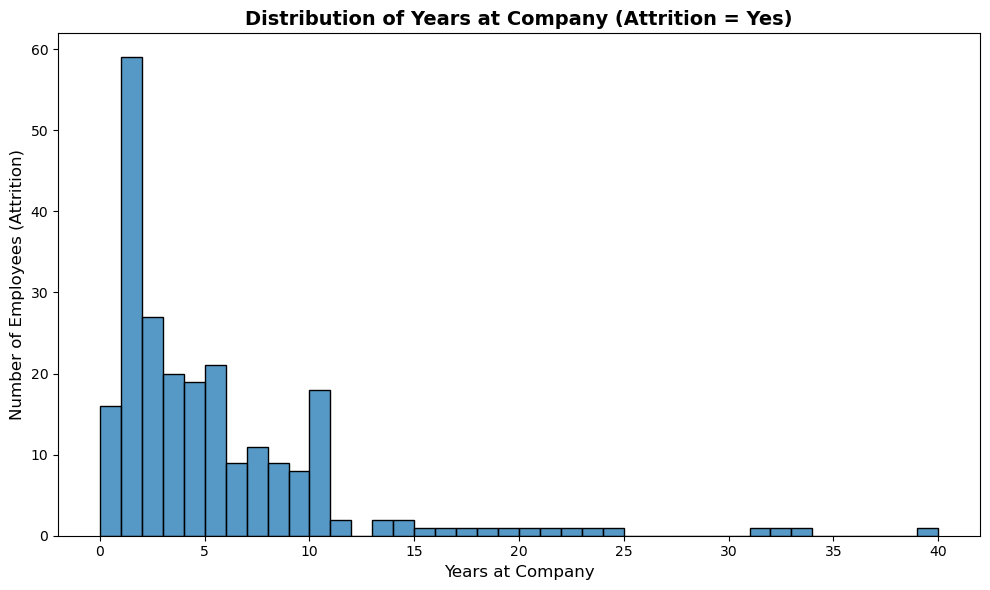

In [93]:
plt.figure(figsize=(10, 6))

sns.histplot(df[df['Attrition']=='Yes']['YearsAtCompany'], bins=40)

plt.xlabel("Years at Company", fontsize = 12)
plt.ylabel("Number of Employees (Attrition)", fontsize = 12)
plt.title("Distribution of Years at Company (Attrition = Yes)", fontsize = 14, weight = 'bold')
plt.tight_layout()

#### The highest spike is in year 1–2, meaning many employees leave very soon after joining. After around ~5 years, the frequency of attrition drops steadily. While a few attritions occur after 15–20+ years, they are very uncommon.

## Compensation & Fairness

### Do lower-paid employees leave at higher rates?

In [156]:
df[df['Attrition']=='Yes']['MonthlyIncome'].mean().round(2)

4787.09

In [157]:
df[df['Attrition']=='No']['MonthlyIncome'].mean().round(2)

6832.74

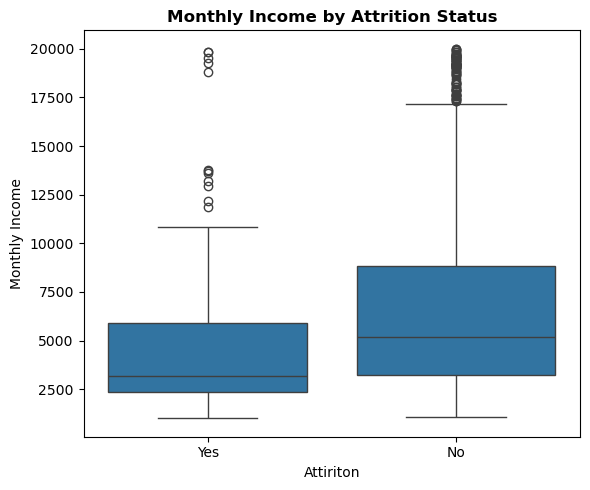

In [153]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)

plt.title("Monthly Income by Attrition Status", fontsize = 12, weight = 'bold')
plt.xlabel('Attiriton', fontsize = 10)
plt.ylabel('Monthly Income', fontsize = 10)

plt.tight_layout()

In [94]:
income_bins = [0, 2500, 5000, 10000, 20000]
income_labels = ['0-2500', '2500-5000', '5000-10000', '10000-20000']
df['MonthlyIncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=income_bins, labels=income_labels)

In [184]:
all_income_groups = df.groupby('MonthlyIncomeGroup', observed=False).size().reset_index(name='Count')

In [185]:
attrition_income_groups = df[df['Attrition']=='Yes'].groupby('MonthlyIncomeGroup', observed=False).size().reset_index(name='Attrition Count')

In [97]:
income_results = all_income_groups.merge(attrition_income_groups, on='MonthlyIncomeGroup')

In [98]:
income_results['% of Attrition'] = np.round(income_results['Attrition Count'] / income_results['Count'] * 100, 2)

In [99]:
income_results

,MonthlyIncomeGroup,Count,Attrition Count,% of Attrition
0,0-2500,226,77,34.07
1,2500-5000,523,86,16.44
2,5000-10000,440,49,11.14
3,10000-20000,281,25,8.90


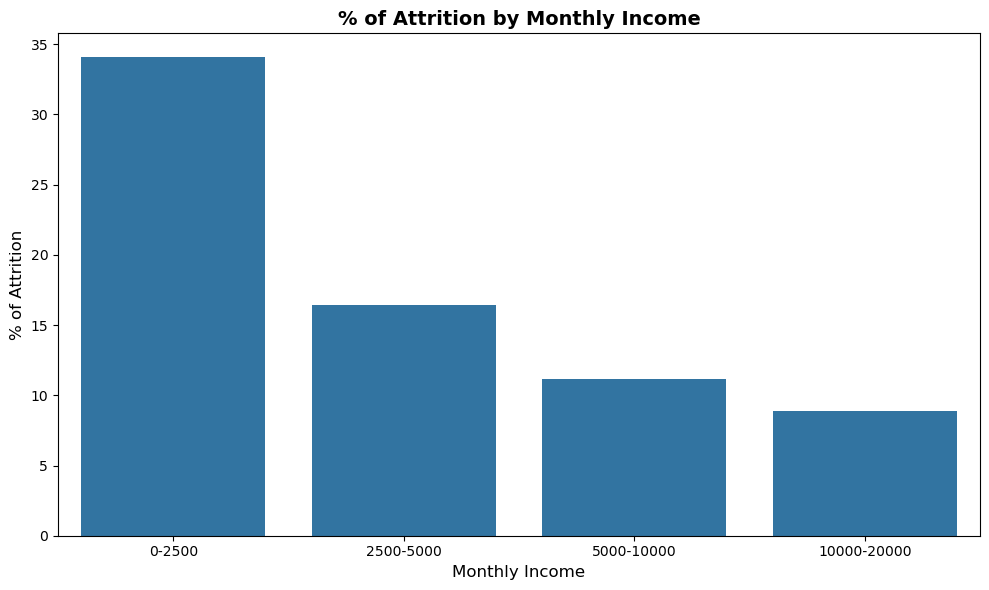

In [100]:
plt.figure(figsize=(10, 6))

sns.barplot(income_results, x='MonthlyIncomeGroup', y='% of Attrition')

plt.title('% of Attrition by Monthly Income', fontsize = 14, weight = 'bold')
plt.xlabel('Monthly Income', fontsize = 12)
plt.ylabel('% of Attrition', fontsize = 12)
plt.tight_layout()

#### On average, employees who left earned 4,787$, compared to 6,833$ for those who stayed. The chart shows that salary has a strong impact on attrition: 34.1% of employees earning 0–2,500 leave the company, while attrition steadily decreases with higher salaries, reaching only 8.9% in the 10,000–20,000 range. To test whether this difference in income between employees who left and those who stayed is statistically significant, I will perform a Two-Sample t-Test.

### Two-Sample t-Test: Attrition vs. Monthly Income

α = 0.05

H₀: There is no difference in MonthlyIncome between leavers and stayers.

H₁: There is a difference in MonthlyIncome between leavers and stayers.


In [101]:
left = df[df['Attrition']=="Yes"]['MonthlyIncome']
stayed = df[df['Attrition']=="No"]['MonthlyIncome']

In [102]:
t_stat, p_value = stats.ttest_ind(a=left,
                b=stayed,
                equal_var=False)

In [103]:
np.round(p_value, 13)

4e-13

#### A p-value of 4e-13 strongly rejects H₀ — there is a statistically significant difference in mean MonthlyIncome between leavers and stayers.

### Is attrition higher among employees who earn less than the departmental average?

In [104]:
department_avg_income = df.groupby('Department')["MonthlyIncome"].mean().round(2).reset_index(name='DeptAvgIncome')

In [105]:
attrition_deptavg = df.merge(department_avg_income, how='left', on='Department')[['Attrition', 'MonthlyIncome', 'Department', 'DeptAvgIncome']]

In [106]:
attrition_deptavg.head(5)

,Attrition,MonthlyIncome,Department,DeptAvgIncome
0,Yes,5993,Sales,6959.17
1,No,5130,Research & Development,6281.25
2,Yes,2090,Research & Development,6281.25
3,No,2909,Research & Development,6281.25
4,No,3468,Research & Development,6281.25


In [107]:
num_low_income_attrition = len(attrition_deptavg[(attrition_deptavg['Attrition']=='Yes')&(attrition_deptavg['MonthlyIncome']<attrition_deptavg['DeptAvgIncome'])])

In [108]:
num_attrition = len(attrition_deptavg[attrition_deptavg['Attrition']=='Yes'])

In [109]:
np.round(num_low_income_attrition / num_attrition*100, 2)

79.75

#### Almost 80% of attrition comes from employees earning below their department’s average, suggesting that being underpaid relative to peers may increase the likelihood of leaving.

## Department/Role Differences

### Which departments or job roles have the highest attrition rates?

#### Department

In [110]:
department_attrition = (
    df.groupby(['Department', 'Attrition'])
    .size()
    .reset_index(name = 'Count')
    .pivot(index='Department', columns = 'Attrition', values='Count')
    .fillna(0)
    .reset_index()
)

In [111]:
department_attrition.columns.name = None

In [112]:
department_attrition['Total'] = department_attrition['No'] + department_attrition['Yes']

In [113]:
department_attrition['% of Attrition'] = np.round(department_attrition['Yes'] / department_attrition['Total'] * 100, 2)

In [114]:
department_attrition

,Department,No,Yes,Total,% of Attrition
0,Human Resources,51,12,63,19.05
1,Research & Development,828,133,961,13.84
2,Sales,354,92,446,20.63


#### Job Role

In [116]:
role_attrition = (
    df.groupby(['JobRole', 'Attrition'])
    .size()
    .reset_index(name = 'Count')
    .pivot(index='JobRole', columns = 'Attrition', values='Count')
    .fillna(0)
    .reset_index()
)

In [117]:
role_attrition.columns.name = None

In [118]:
role_attrition['Total'] = role_attrition['No'] + role_attrition['Yes']

In [119]:
role_attrition['% of Attrition'] = np.round(role_attrition['Yes'] / role_attrition['Total'] * 100, 2)

In [120]:
role_attrition.sort_values('% of Attrition', ascending=False)

,JobRole,No,Yes,Total,% of Attrition
8,Sales Representative,50,33,83,39.76
2,Laboratory Technician,197,62,259,23.94
1,Human Resources,40,12,52,23.08
7,Sales Executive,269,57,326,17.48
6,Research Scientist,245,47,292,16.10
4,Manufacturing Director,135,10,145,6.90
0,Healthcare Representative,122,9,131,6.87
3,Manager,97,5,102,4.90
5,Research Director,78,2,80,2.50


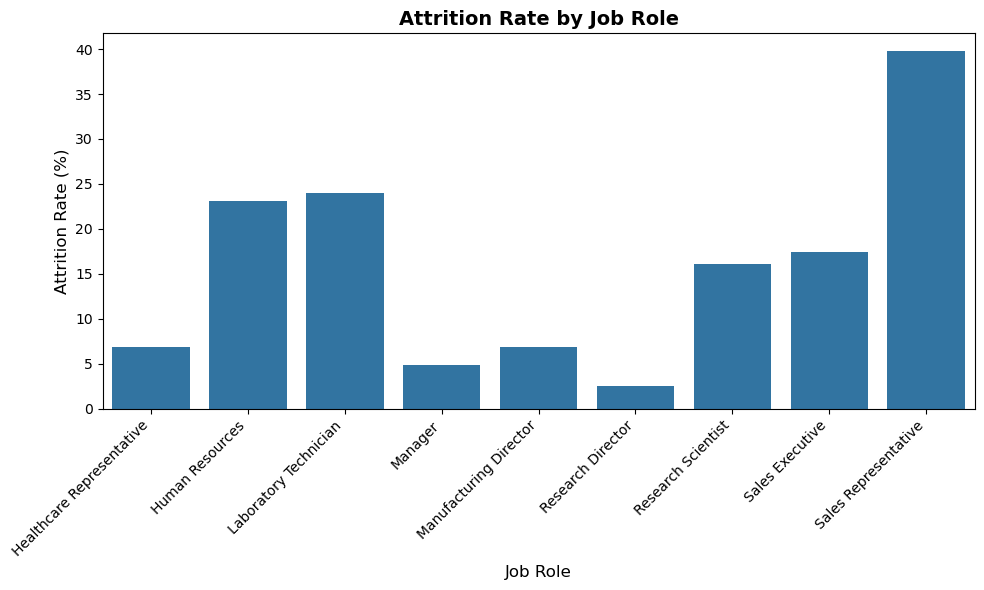

In [162]:
plt.figure(figsize=(10,6))
sns.barplot(data=role_attrition, x='JobRole', y='% of Attrition')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Role', fontsize = 12)
plt.ylabel('Attrition Rate (%)', fontsize = 12)
plt.title('Attrition Rate by Job Role', fontsize = 14, weight = 'bold')
plt.tight_layout()

#### Attrition is highest among Sales Representatives (39.8%) and within the Sales Department overall (20.6%).

### Are technical vs non-technical roles affected differently by attrition?

In [121]:
technical_roles = ['Laboratory Technician', 'Research Scientist', 'Research Director', 'Manufacturing Director']

In [122]:
role_attrition['JobRoleType'] = role_attrition['JobRole'].apply(lambda x: 'Technical' if x in technical_roles else 'Non-Technical')

In [123]:
role_attrition.sort_values('% of Attrition', ascending=False)

,JobRole,No,Yes,Total,% of Attrition,JobRoleType
8,Sales Representative,50,33,83,39.76,Non-Technical
2,Laboratory Technician,197,62,259,23.94,Technical
1,Human Resources,40,12,52,23.08,Non-Technical
7,Sales Executive,269,57,326,17.48,Non-Technical
6,Research Scientist,245,47,292,16.10,Technical
4,Manufacturing Director,135,10,145,6.90,Technical
0,Healthcare Representative,122,9,131,6.87,Non-Technical
3,Manager,97,5,102,4.90,Non-Technical
5,Research Director,78,2,80,2.50,Technical


In [124]:
role_attrition.groupby('JobRoleType')['% of Attrition'].mean().reset_index()

,JobRoleType,% of Attrition
0,Non-Technical,18.418
1,Technical,12.360


#### Yes, attrition affects technical and non-technical roles differently. Non-technical roles tend to have higher attrition on average (≈18.4%) compared to technical roles (≈12.4%). In particular, Sales Representatives show the highest attrition, while technical leadership roles like Research Director and Manufacturing Director experience very low turnover.

## Travel & Work-Life Balance

### Do employees who travel frequently for business have higher attrition?

In [127]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [128]:
travel = df.groupby('BusinessTravel').size().reset_index(name='Count')

In [129]:
travel_attrition = df[df['Attrition']=='Yes'].groupby('BusinessTravel').size().reset_index(name='Attrition Count')

In [130]:
full_travel = travel.merge(travel_attrition, on='BusinessTravel')

In [ ]:
full_travel['% of Attrition'] = np.round(full_travel['Attrition Count'] / full_travel['Count'] * 100, 2)

In [172]:
full_travel = full_travel.sort_values('% of Attrition')

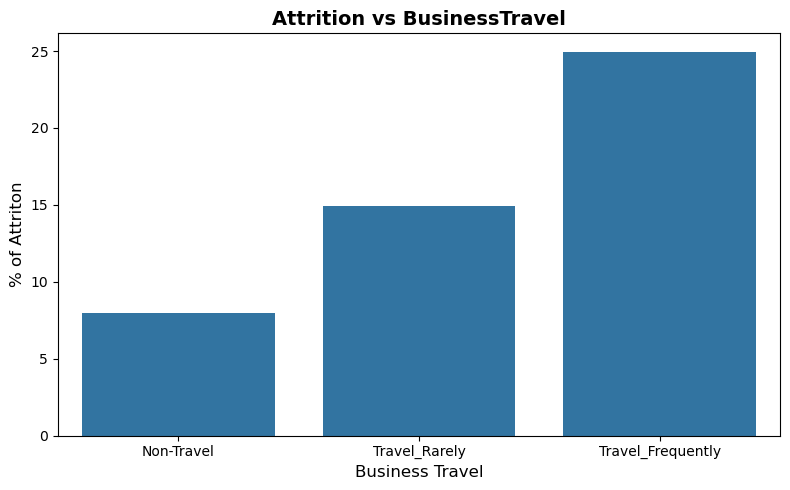

In [176]:
plt.figure(figsize=(8,5))

sns.barplot(full_travel, x='BusinessTravel', y='% of Attrition')

plt.title('Attrition vs BusinessTravel', fontsize = 14, weight = 'bold')
plt.xlabel('Business Travel', fontsize = 12)
plt.ylabel('% of Attriton', fontsize = 12)
plt.tight_layout()

#### The data suggests that employees who travel frequently for business experience higher attrition rates(24.9%) compared to other groups. This indicates that frequent business travel is associated with the highest attrition risk, nearly three times higher than for non-travelers(8%). Employees who travel rarely fall in between the two groups(15%).

## Is poor work-life balance a significant factor in leaving?

In [ ]:
work_life_balance_df

,WorkLifeBalanceCode,WorkLifeBalanceType
0,1,Bad
1,2,Good
2,3,Better
3,4,Best


In [ ]:
wlbalance = df.groupby('WorkLifeBalance').size().reset_index(name='Count')

In [ ]:
wlbalance_attrition = df[df['Attrition']=='Yes'].groupby('WorkLifeBalance').size().reset_index(name='Attrition Count')

In [ ]:
full_wlbalance = wlbalance.merge(wlbalance_attrition, on='WorkLifeBalance')

In [ ]:
full_wlbalance['% of Attrition'] = np.round(full_wlbalance['Attrition Count'] / full_wlbalance['Count'] * 100, 2)

In [177]:
work_life_balance_attrition = full_wlbalance.merge(work_life_balance_df, left_on='WorkLifeBalance', right_on='WorkLifeBalanceCode')[['WorkLifeBalanceType', 'Count', 'Attrition Count', '% of Attrition']]

In [178]:
work_life_balance_attrition

,WorkLifeBalanceType,Count,Attrition Count,% of Attrition
0,Bad,80,25,31.25
1,Good,344,58,16.86
2,Better,893,127,14.22
3,Best,153,27,17.65


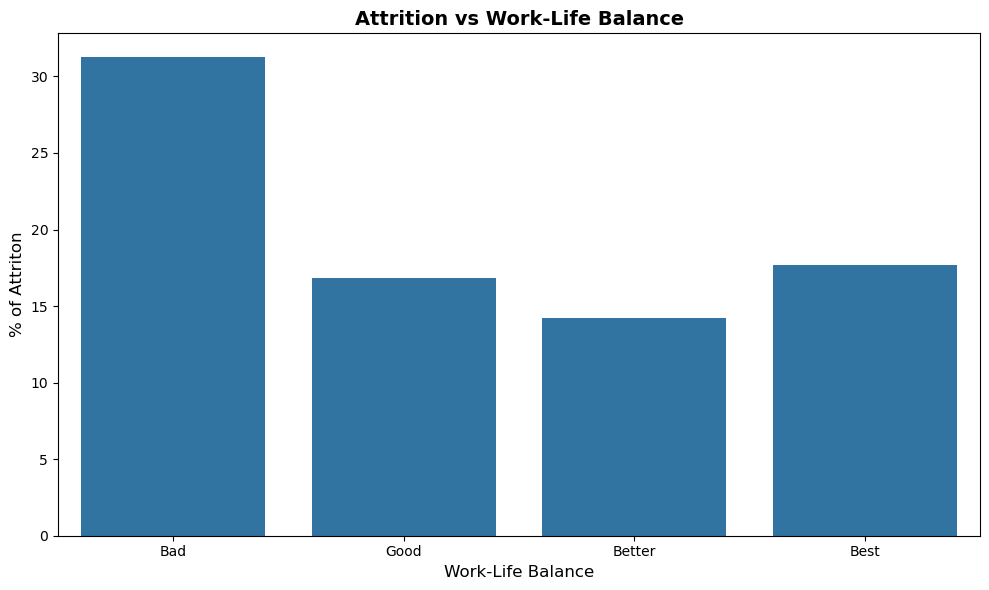

In [179]:
plt.figure(figsize=(10,6))

sns.barplot(work_life_balance_attrition, x='WorkLifeBalanceType', y='% of Attrition')

plt.title('Attrition vs Work-Life Balance', fontsize = 14, weight = 'bold')
plt.xlabel('Work-Life Balance', fontsize = 12)
plt.ylabel('% of Attriton', fontsize = 12)
plt.tight_layout()

#### Yes, the data shows that poor work-life balance is strongly associated with higher attrition. This suggests that employees with bad work-life balance leave at roughly double the rate of other groups. However, among employees with good, better, or best balance, attrition rates are relatively similar.